# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [143]:
#Import all the necessary modules
%matplotlib inline
import pandas as pd
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import numpy as np
col_Names=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [144]:
pima_df = pd.read_csv('pima-indians-diabetes.data', names=col_Names)


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [145]:
print pima_df.head(10)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

# Q3 Print the datatypes of each column and the shape of the dataset 

In [146]:
print pima_df.dtypes
print pima_df.info()
print pima_df.shape

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [147]:
#print data
columns=pima_df[0:0]

for column in columns:
    colmed=pima_df[column].median()
    pima_df[column].replace(0,colmed,inplace=True)
    
    
print pima_df

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              3      137             40             35    168.0  43.1   
5              5      116             74             23     30.5  25.6   
6              3       78             50             32     88.0  31.0   
7             10      115             72             23     30.5  35.3   
8              2      197             70             45    543.0  30.5   
9              8      125             96             23     30.5  32.0   
10             4      110             92             23     30.5  37.6   
11            10      168             74             23     30.5  38.0   
12            10      139             

# Q5 Print the descriptive statistics of each & every column using describe() function

In [148]:
pima_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.278646  121.656250      72.386719      27.334635   94.652344   
std       3.021516   30.438286      12.096642       9.229014  105.547598   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

AxesSubplot(0.125,0.125;0.775x0.755)


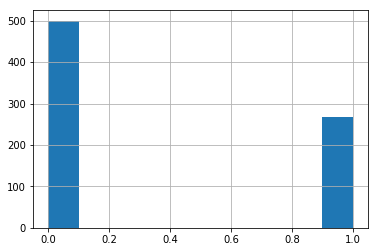

In [149]:

#data.corr()
print pima_df.iloc[:,-1].hist()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [150]:
pima_df.corr()
# the only +ve correlations are 0.538 rest are either -ve or very minimum like 0.14, 0.24 0.06 or -0.05, or-0.01

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.149326       0.247530       0.060706   
Glucose                      0.149326  1.000000       0.218937       0.172143   
BloodPressure                0.247530  0.218937       1.000000       0.147809   
SkinThickness                0.060706  0.172143       0.147809       1.000000   
Insulin                     -0.059580  0.357573      -0.028721       0.238188   
BMI                          0.080540  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.016151  0.137327      -0.002378       0.142977   
Age                          0.538169  0.266909       0.324915       0.054514   
Outcome                      0.245466  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.059580  0.080540                 -0.016151   
Glucose                   0.357573  0.231400                  0.137327   
BloodPressure            -0.028721  0.281132                 -0.002378   
SkinThickness             0.238188  0.546951                  0.142977   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   
Outcome                   0.148457  0.312249                  0.173844   

                               Age   Outcome  
Pregnancies               0.538169  0.245466  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.054514  0.189065  
Insulin                  -0.015413  0.148457  
BMI                       0.025744  0.312249  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

Using bivariate analysis check for useful relationships between attributes and attributes and the target class



# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


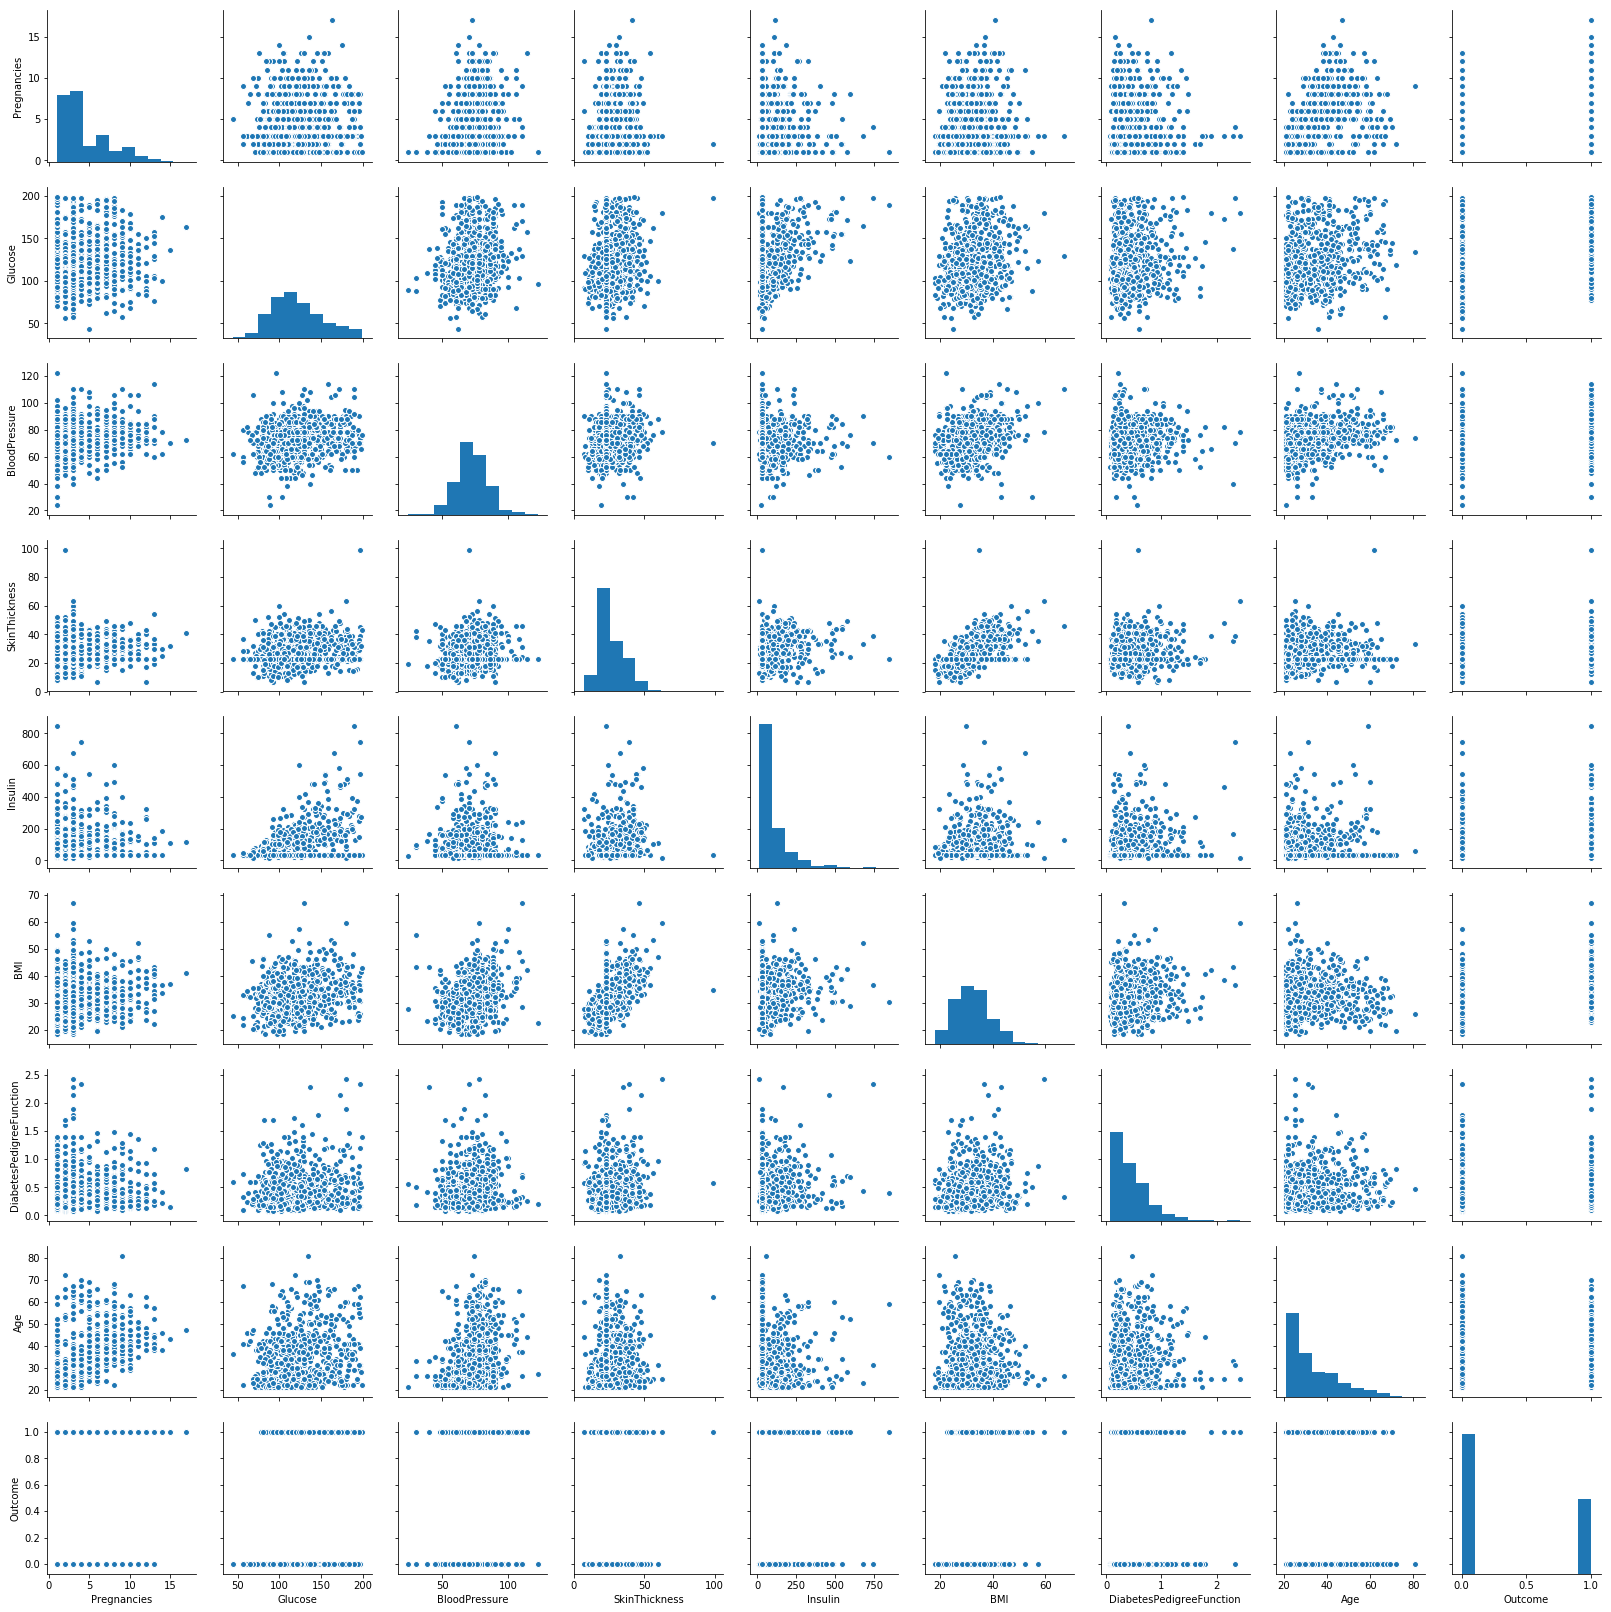

In [151]:
import seaborn as sns
#sns.pairplot(data, hue = "default")
sns.pairplot(data=pima_df)

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [152]:
X = pima_df.drop("Outcome" , axis=1)

y = pima_df.pop("Outcome")




#y = pima_df.iloc[0:,0:8]  

#X = pima_df.iloc[0:,-1]



# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
train_set,test_set, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [153]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [154]:
from sklearn import metrics
y_predict = dt_model.predict(test_set)
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))


1.0
0.696969696969697
[[112  34]
 [ 36  49]]


Print the feature importance of the decision model - Optional

In [155]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                               Imp
Pregnancies               0.070481
Glucose                   0.250772
BloodPressure             0.121664
SkinThickness             0.048823
Insulin                   0.000000
BMI                       0.269094
DiabetesPedigreeFunction  0.123952
Age                       0.115214


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [156]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

In [157]:
y_predict = rfcl.predict(test_set)
print(rfcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.7835497835497836
[[128  18]
 [ 32  53]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [158]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(train_set, train_labels)

In [159]:
y_predict = abcl.predict(test_set)
print(abcl.score(test_set , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.7705627705627706
[[128  18]
 [ 35  50]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [160]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(train_set, train_labels)

In [161]:
y_predict = bgcl.predict(test_set)

print(bgcl.score(test_set , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.7662337662337663
[[128  18]
 [ 36  49]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(train_set, train_labels)

In [163]:
y_predict = gbcl.predict(test_set)
print(gbcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.7965367965367965
[[126  20]
 [ 27  58]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.